# Employee Attrition Prediction


In [45]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [46]:
sns.set_theme()

### T1.

Find MLE of $\alpha$, given observed price at the end of each day $y_2$, $y_1$, $y_0$.

From Markov process assumption: $\Pr(y_2,y_1,y_0 \mid \alpha)=\Pr(y_2\mid y_1,\alpha) \Pr(y_1 \mid y_0,\alpha) \Pr(y_0 \mid \alpha)$

Given $y_2 \sim N(\alpha y_1, \sigma^2)$, $y_1 \sim N(\alpha y_0, \sigma^2)$

Since $\Pr(y_0 \mid \alpha)$ does not include $\alpha$, we can ignore it.

$\text{likelihood}=\dfrac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\dfrac1{2\sigma^2} \left(y_2-\alpha y_1\right)^2\right) \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\dfrac1{2\sigma^2} \left( y_1-\alpha y_0\right)^2\right)$

Using log-likelihood $L(\alpha) = \dfrac{-(y_2-\alpha y_1)^2}{2\sigma^2}-\dfrac{(y_1-\alpha y_0)^2}{2\sigma^2} - \log(2\pi\sigma^2)$

Differentiate w.r.t $\alpha$ and set to 0:
$\dfrac{\partial L}{\partial \alpha} = \dfrac{y_2-\alpha y_1}{\sigma^2}y_1 + \dfrac{y_1-\alpha y_0}{\sigma^2}y_0 = 0$

Simplifying gives $\alpha = \dfrac{y_2y_1+y_1y_0}{y_1^2+y_0^2}$.


### T2.


decision boundary [2.]


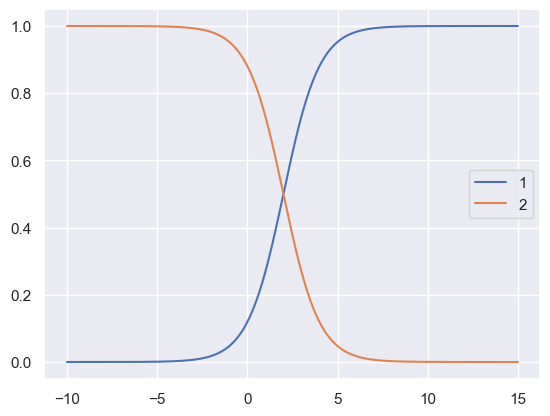

In [97]:
from scipy.stats import norm
from scipy.optimize import fsolve

x = np.linspace(-10, 15, 500)
y1 = norm.pdf(x, loc=4, scale=2)
y2 = norm.pdf(x, loc=0, scale=2)
z = y1 * 0.5 + y2 * 0.5
plt.plot(x, (y1 * 0.5) / z, label="1")
plt.plot(x, (y2 * 0.5) / z, label="2")
plt.legend()
solution = fsolve(
    lambda x: norm.pdf(x, loc=4, scale=2) - norm.pdf(x, loc=0, scale=2), 2
)

print("decision boundary", solution)

### T3.


decision boundary [0.90138771]


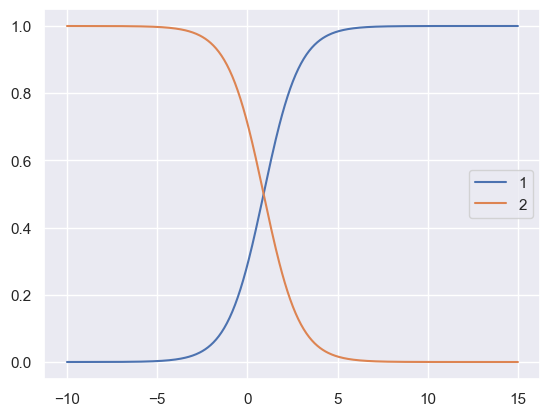

In [98]:
x = np.linspace(-10, 15, 500)
y1 = norm.pdf(x, loc=4, scale=2)
y2 = norm.pdf(x, loc=0, scale=2)
z = y1 * 0.75 + y2 * 0.25
plt.plot(x, (y1 * 0.75) / z, label="1")
plt.plot(x, (y2 * 0.25) / z, label="2")
plt.legend()
solution = fsolve(
    lambda x: 0.75 * norm.pdf(x, loc=4, scale=2) - 0.25 * norm.pdf(x, loc=0, scale=2), 2
)

print("decision boundary", solution)

### OT2.


### OT3.


decision boundary [1.52483218] [9.14183449]


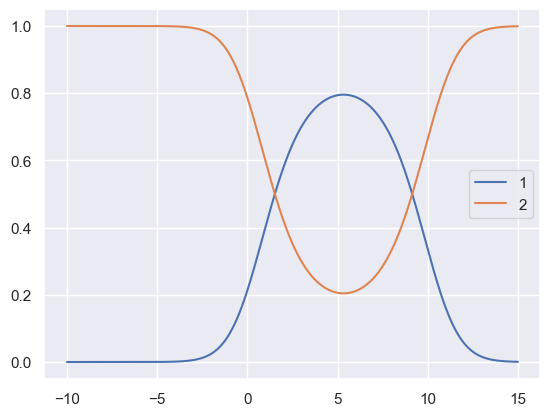

In [108]:
x = np.linspace(-10, 15, 500)
y1 = norm.pdf(x, loc=4, scale=2)
y2 = norm.pdf(x, loc=0, scale=4)
z = y1 * 0.5 + y2 * 0.5
plt.plot(x, (y1 * 0.5) / z, label="1")
plt.plot(x, (y2 * 0.5) / z, label="2")
plt.legend()
sol1 = fsolve(
    lambda x: 0.5 * norm.pdf(x, loc=4, scale=2) - 0.5 * norm.pdf(x, loc=0, scale=4), 2
)
sol2 = fsolve(
    lambda x: 0.5 * norm.pdf(x, loc=4, scale=2) - 0.5 * norm.pdf(x, loc=0, scale=4),
    10,
)
print("decision boundary", sol1, sol2)

### read CSV


In [49]:
x = pd.read_csv("hr-employee-attrition-with-null.csv")

### Dataset statistic


In [50]:
x.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [51]:
x.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation


In [52]:
x["Attrition"] = x["Attrition"].map({"Yes": 1, "No": 0})
string_categorical_col = [
    "Department",
    "Attrition",
    "BusinessTravel",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
]

for col in string_categorical_col:
    x[col] = pd.Categorical(x[col]).codes

x = x.drop(
    columns=[
        "EmployeeNumber",
        "Unnamed: 0",
        "EmployeeCount",
        "StandardHours",
        "Over18",
    ]
)

### Spliting data into train and test


In [53]:
df_train, df_test = train_test_split(
    x, test_size=0.1, stratify=x["Attrition"], random_state=1
)

In [54]:
display(df_train["Attrition"].value_counts(normalize=True))
display(df_test["Attrition"].value_counts(normalize=True))

Attrition
0    0.839002
1    0.160998
Name: proportion, dtype: float64

Attrition
0    0.836735
1    0.163265
Name: proportion, dtype: float64

### Display histogram of each feature


In [55]:
def display_histogram(df, col_name, n_bin=40, ax=None):
    if ax is None:
        ax = plt
    hist, edges = np.histogram(df.loc[df[col_name].notna(), col_name], n_bin)
    ax.stairs(hist, edges, fill=True)

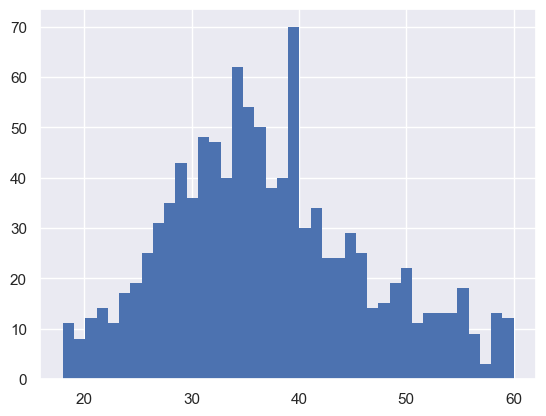

In [56]:
display_histogram(df_train, "Age")

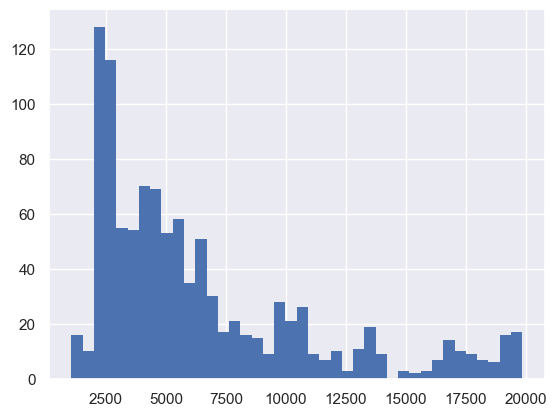

In [57]:
display_histogram(df_train, "MonthlyIncome")

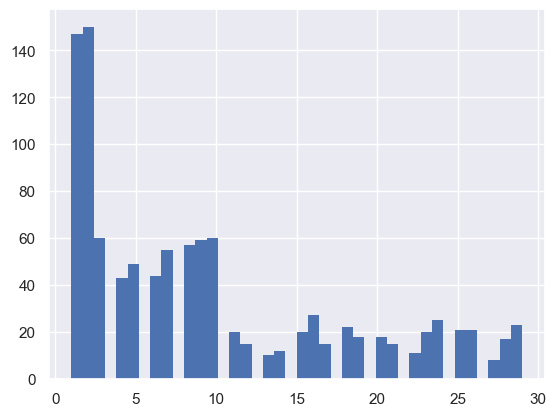

In [58]:
display_histogram(df_train, "DistanceFromHome")

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?


In [59]:
def count_zeros(df, col_name, bins=40):
    counts, _ = np.histogram(df.loc[df[col_name].notna(), col_name], bins=bins)
    return np.sum(counts == 0)

In [60]:
count_zeros(df_train, "Age"), count_zeros(df_train, "MonthlyIncome"), count_zeros(
    df_train, "DistanceFromHome"
)

(0, 1, 11)

Age, MonthyIncome, and DistanceFromHome have 0, 1, and 11 bins with zero counts respectively.  
Age and MonthlyIncome histogram looks fine, but could use a lower number of bins to reduce the amount of fluctuation, for example a peak around Age 40.  
DistanceFromHome have many bins with zero counts that needs to be dealt with by lowering number of bins.


### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?


Age could be modeled with a Gaussian distribution. Monthly Income and Distance from Home doesn't show multimodal behavior, so GMM might not be the best choice. Perhaps consider model them with Poisson or Negative Binomial Distribution.


### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?


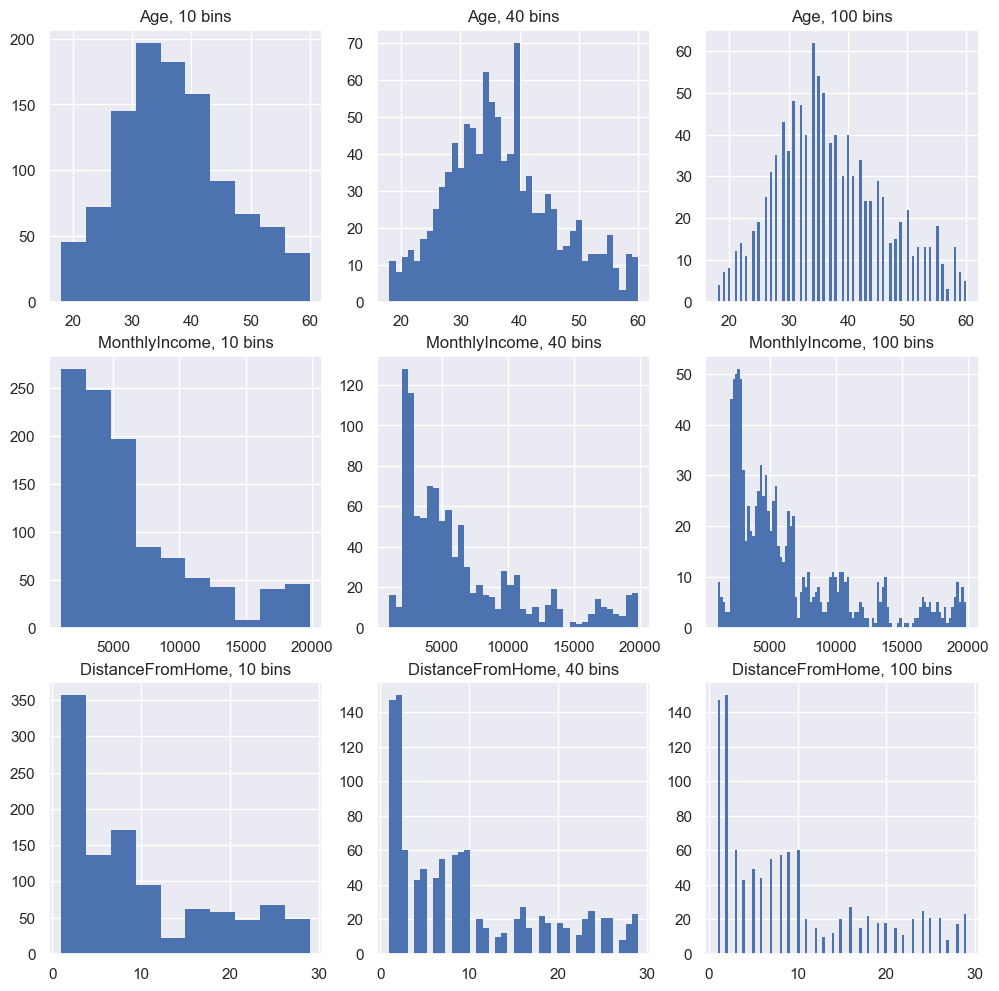

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(["Age", "MonthlyIncome", "DistanceFromHome"]):
    for j, bins in enumerate([10, 40, 100]):
        display_histogram(df_train, col, bins, ax[i, j])

        ax[i, j].set_title(f"{col}, {bins} bins")

10 bins for Age and DistanceFromHome, 40 bins for MonthlyIncome.  
Age range is quite narrow so dividing into 10 bins will also help filter out noises from the data.  
MonthlyIncome range is large, 40 bins will capture more information while not resulting in zero bins, and too noisy data.  
DistanceFromHome need low bin counts to combat zero count bins.


### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values


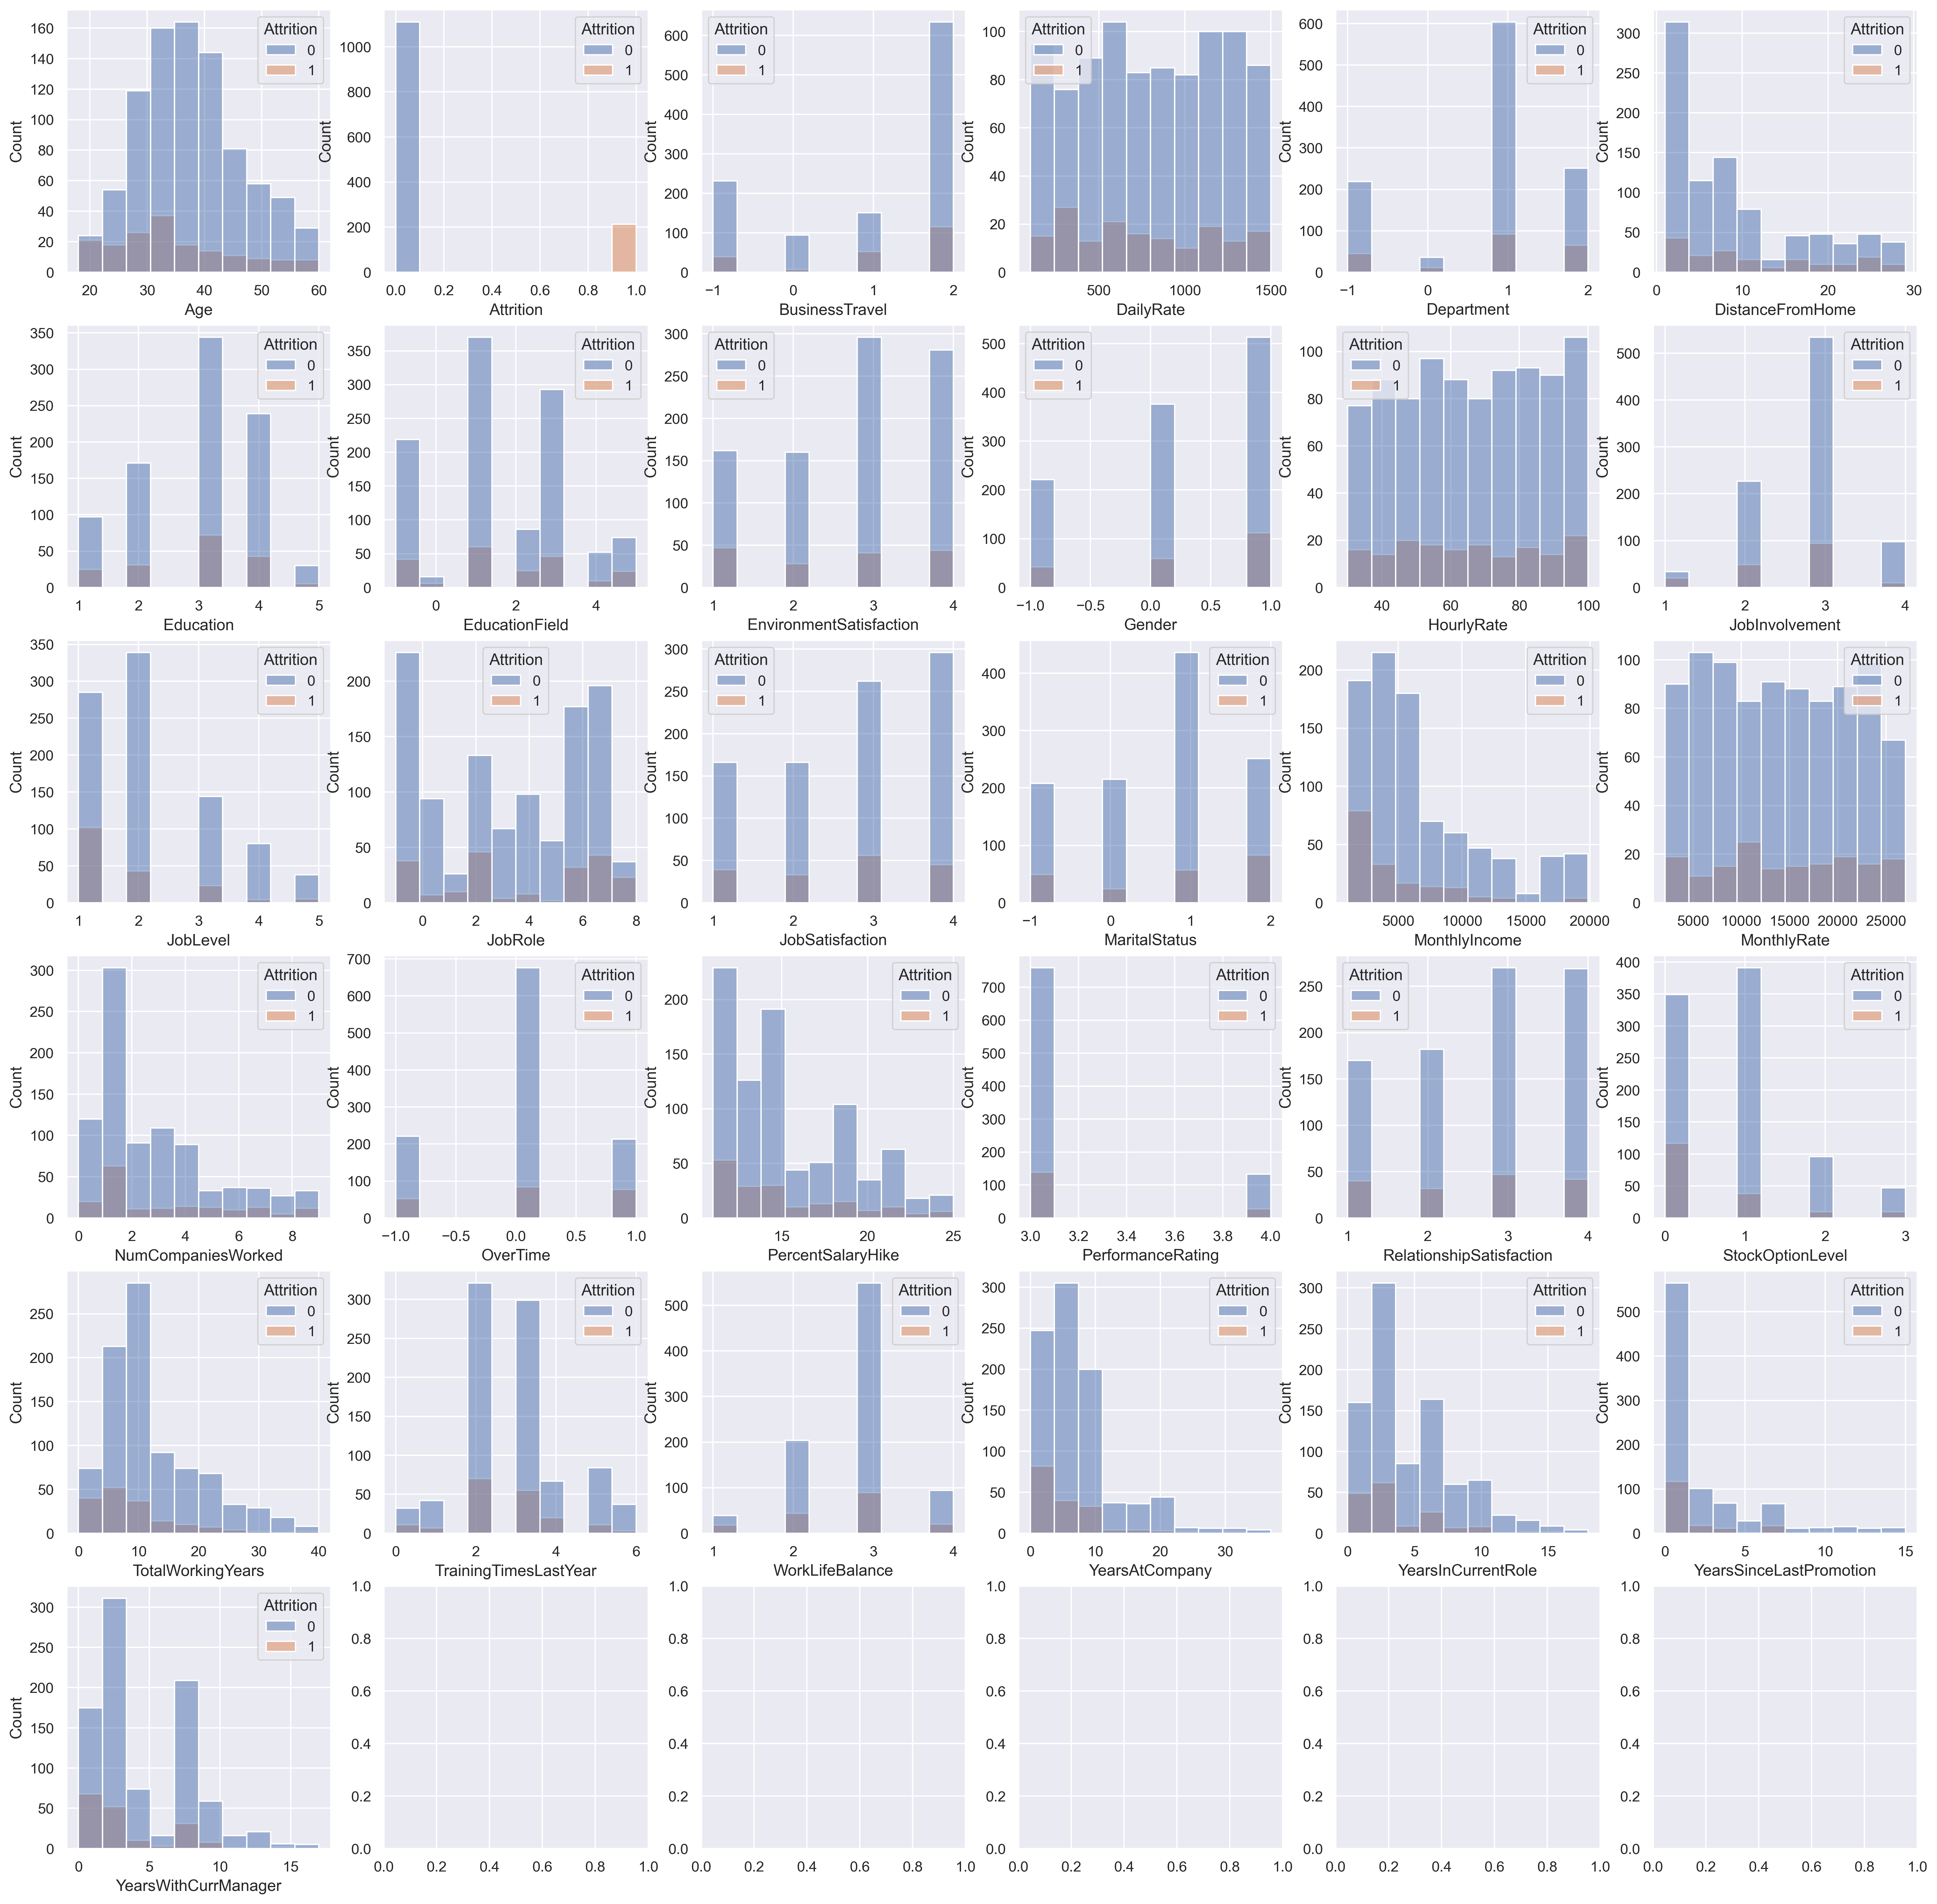

In [62]:
fig, ax = plt.subplots(6, 6)
fig.set_size_inches(25, 25)
fig.set_dpi(300)
for i, col in enumerate(df_train.columns.tolist()):
    sns.histplot(
        df_train[df_train[col].notna()],
        x=col,
        hue="Attrition",
        bins=10,
        ax=ax[i // 6, i % 6],
    )

Along with the mentioned features: Age, MonthlyIncome, and DistanceFromHome.

Continuous features and features with more than 10 unique values should be discretized:

- Daily rate
- Hourly rate
- Monthly rate
- Percent salary hike
- Total working years
- Years at company
- Years in current role
- Years since last promotion
- Years with current manager


### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.


Multinomial distribution could be used to model histogram. Each bin is modeled as a distinct group with the associated probability $p_i$. The MLE estimator for each group is $\frac{x_i}n$ where $x_i$ is the count of bin i and n is the total number of data points. The likelihood distribution of mentioned features could be seen above.


### T9. What is the prior distribution of the two classes?


In [63]:
df_train["Attrition"].value_counts(normalize=True)

Attrition
0    0.839002
1    0.160998
Name: proportion, dtype: float64

In [64]:
def discretize(x, y, col, target, bins):
    view = x.loc[x[col].notna() & (y == target), col]
    freq, edges = np.histogram(view, bins)
    edges[0] = -np.inf
    edges[-1] = np.inf
    freq = pd.Series(freq)
    freq = (
        freq.replace(0, np.nan)
        .fillna((freq.shift(1).fillna(0) + freq.shift(-1).fillna(0)) / 2)
        .replace(0, 1e-20)
    )
    return freq.to_numpy() / view.shape[0], edges


def categorical_freq(x, y, col, target):
    view = x.loc[x[col].notna() & (y == target), col]
    cnt = Counter(view)
    for k in cnt:
        cnt[k] /= view.shape[0]
    return cnt

### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.


- Assign the bin with zero count the average probability of its neighbors.
- If the bin probability is still zero, assign some small floating point number to avoid problems with calculating log likelihood.


In [65]:
class NaiveBayesClassifier:
    def __init__(self, discretize_cols):
        self.pr = {}
        self.pr[0] = {}
        self.pr[1] = {}
        self.edges = {}
        self.edges[0] = {}
        self.edges[1] = {}
        self.mean = {}
        self.mean[0] = {}
        self.mean[1] = {}
        self.std = {}
        self.std[0] = {}
        self.std[1] = {}
        self.discretize_cols = discretize_cols

    def fit(self, x: pd.DataFrame, y: pd.Series, bins=40):
        self.prior_neg = np.sum(y == 0) / y.shape[0]
        self.prior_pos = np.sum(y == 1) / y.shape[0]
        for cls in [0, 1]:
            for col in x.columns:
                if col in self.discretize_cols:
                    pr, edges = discretize(x, y, col, cls, bins)
                    self.pr[cls][col] = pr
                    self.edges[cls][col] = edges
                    self.mean[cls][col] = x[col].mean()
                    self.std[cls][col] = x[col].std()
                else:
                    self.pr[cls][col] = categorical_freq(x, y, col, cls)

    def predict(self, x: pd.DataFrame, returns_prob=False, t=0):
        def decision(s: pd.Series):
            res = np.log(self.prior_pos) - np.log(self.prior_neg)
            for col in x.columns:
                if np.isnan(s[col]):
                    continue
                if col in self.discretize_cols:
                    bin_neg = np.searchsorted(self.edges[0][col], s[col]) - 1
                    bin_pos = np.searchsorted(self.edges[1][col], s[col]) - 1
                    res += np.log(self.pr[1][col][bin_pos]) - np.log(
                        self.pr[0][col][bin_neg]
                    )
                else:
                    res += np.log(self.pr[1][col][s[col]]) - np.log(
                        self.pr[0][col][s[col]]
                    )
            return res if returns_prob else res > t

        return x.apply(decision, axis=1)

    def predict_normal(self, x: pd.DataFrame, returns_prob=False, t=0):
        def decision(s: pd.Series):
            res = np.log(self.prior_pos) - np.log(self.prior_neg)
            for col in x.columns:
                if np.isnan(s[col]):
                    continue
                if col in self.discretize_cols:
                    from scipy.stats import norm

                    res += np.log(
                        norm(self.mean[1][col], self.std[1][col]).pdf(s[col])
                    ) - np.log(norm(self.mean[0][col], self.std[0][col]).pdf(s[col]))
                else:
                    res += np.log(self.pr[1][col][s[col]]) - np.log(
                        self.pr[0][col][s[col]]
                    )
            return res if returns_prob else res > t

        return x.apply(decision, axis=1)

In [66]:
cols_discretize = [
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "HourlyRate",
    "MonthlyIncome",
    "MonthlyRate",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]
clf = NaiveBayesClassifier(cols_discretize)
x_train = df_train.drop(columns="Attrition")
y_train = df_train["Attrition"]
x_test = df_test.drop(columns="Attrition")
y_test = df_test["Attrition"]
clf.fit(x_train, y_train, bins=10)

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [67]:
def evaluate_model(y_predicted, y_true):
    accuracy = np.sum(y_predicted == y_true) / y_true.shape[0]
    precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
    recall = np.sum(y_predicted & y_true) / np.sum(y_true)
    f1 = 2 * precision * recall / (precision + recall)
    fpr = np.sum(y_predicted & (1 - y_true)) / np.sum(1 - y_true)
    return accuracy, precision, recall, f1, fpr

In [68]:
accuracy, precision, recall, f1, _ = evaluate_model(clf.predict(x_test), y_test)
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}"
)

Accuracy: 0.88, Precision: 0.62, Recall: 0.75, F1: 0.68


### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [69]:
accuracy, precision, recall, f1, _ = evaluate_model(clf.predict_normal(x_test), y_test)
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}"
)

Accuracy: 0.86, Precision: 0.61, Recall: 0.46, F1: 0.52


### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.


In [70]:
rng = np.random.default_rng(1)
y_predicted = rng.choice([0, 1], size=y_test.shape[0], p=[0.5, 0.5])
accuracy, precision, recall, f1, _ = evaluate_model(y_predicted, y_test)
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}"
)

Accuracy: 0.47, Precision: 0.14, Recall: 0.46, F1: 0.22


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.


In [71]:
y_predicted = np.full(y_test.shape[0], y_test.mode().iloc[0])
y_predicted
accuracy, precision, recall, f1, _ = evaluate_model(y_predicted, y_test)
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}"
)

Accuracy: 0.84, Precision: nan, Recall: 0.00, F1: nan


C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)


Calculation of precision results in division by 0, because no positive prediction is made.


### T15. Compare the two baselines with your Naive Bayes classifier.


Written Naive Bayes classifier significantly outperforms random choice baseline both in accuracy, and F1 score.  
While majority rule results in pretty high accuracy, it results in disastrous precision, and recall. The model is basically useless, providing no useful information.


### T16. Use the following threshold values

$ t = np.arange(-5,5,0.05) $

### find the best accuracy, and F score (and the corresponding thresholds)


In [72]:
def plot_roc_curve(prob, y_true):
    fpr = {}
    tpr = {}
    for t in np.arange(-5, 5, 0.05):
        _, _, recall, _, fpr[t] = evaluate_model(prob > t, y_true)
        tpr[t] = recall
    roc = pd.DataFrame({"fpr": fpr, "tpr": tpr})
    roc.plot(x="fpr", y="tpr", drawstyle="steps-post", kind="line")

In [73]:
best_f1_t, best_acc_t = 0, 0
best_f1, best_acc = -1, -1
lh = clf.predict(x_test, returns_prob=True)
for t in np.arange(-5, 5, 0.05):
    accuracy, precision, recall, f1, fpr_t = evaluate_model(lh > t, y_test)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_t = t
    if accuracy > best_acc:
        best_acc = accuracy
        best_acc_t = t

In [74]:
best_f1_t, best_acc_t

(0.1499999999999817, 0.1499999999999817)

Threshold of 0.15 results in both best accuracy and F1 score.


In [75]:
best_acc, best_f1

(0.891156462585034, 0.6923076923076924)

Best accuracy, and F1 results from using threshold of 0.15.


### T17. Plot the RoC of your classifier.


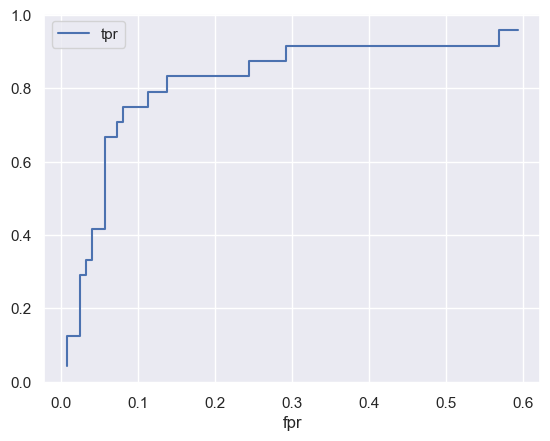

In [76]:
plot_roc_curve(lh, y_test)

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575039.py:3: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(y_predicted & y_true) / np.sum(y_predicted)
C:\Users\mond\AppData\Local\Temp\ipykernel_9644\2049575

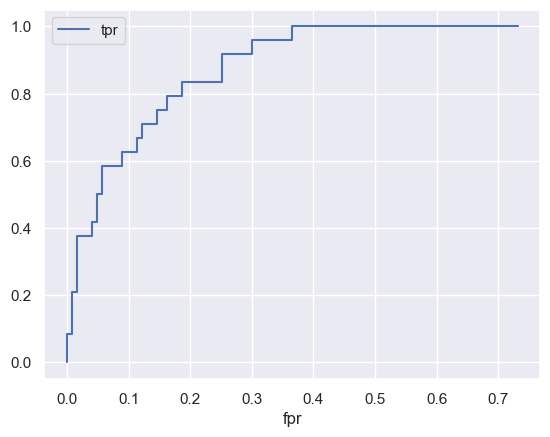

In [77]:
clf2 = NaiveBayesClassifier(cols_discretize)
clf2.fit(x_train, y_train, bins=5)
lh2 = clf2.predict(x_test, returns_prob=True)
plot_roc_curve(lh2, y_test)

### OT4.


In [87]:
def cv():
    acc = 0
    for i in range(10):
        df_train, df_test = train_test_split(
            x, test_size=0.1, stratify=x["Attrition"], shuffle=True, random_state=i
        )
        x_train = df_train.drop(columns="Attrition")
        y_train = df_train["Attrition"]
        x_test = df_test.drop(columns="Attrition")
        y_test = df_test["Attrition"]
        clf = NaiveBayesClassifier(cols_discretize)
        clf.fit(x_train, y_train, bins=10)
        y_predicted = clf.predict(x_test)
        accuracy, _, _, _, _ = evaluate_model(y_predicted, y_test)
        acc += accuracy
    return acc / 10


print(cv())

0.8204081632653061


The model accuracy is decent, though not as much as from calculating from just 1 test set.
